<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/time-series-skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skeleton for Time Series data

* Idea and some code taken from, and also OPSD time series data set explained here: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [1]:
import pandas as pd
print(pd.__version__)

0.24.2


In [2]:
import numpy as np
print(np.__version__)

1.16.4


## Standard Case: explicit time stamp

* each entry belongs to one time stamp
* we just have a sequence of events

_let me know if your case looks different_

In [0]:
pd.read_csv?

In [0]:
# for local
# url = 'opsd_germany_daily.csv'

# for colab
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

time_series_df = pd.read_csv(url, 
                             sep=',', 
                             index_col=0, # you can use the date as the index for pandas
                             parse_dates=[0]) # where is the time stamp?

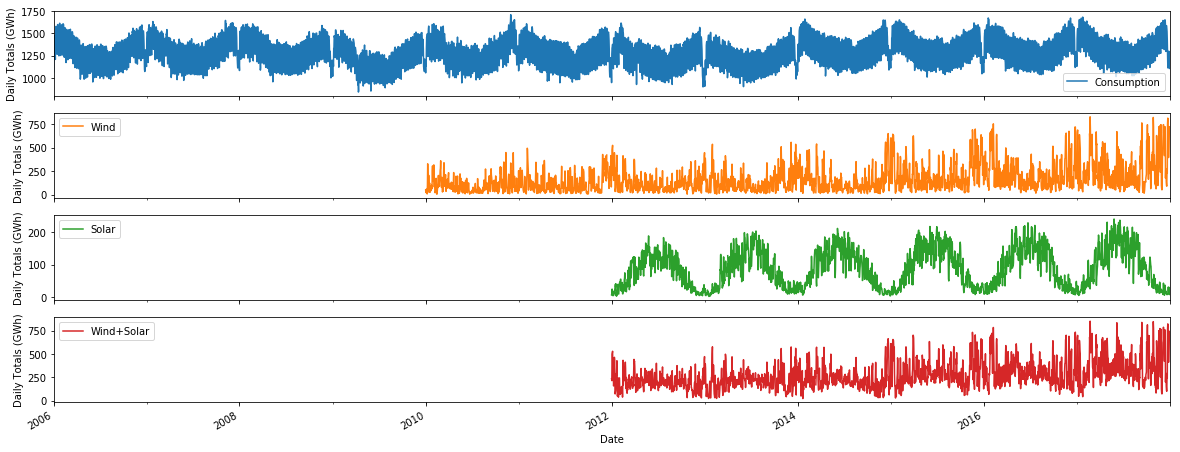

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


axes = time_series_df.plot(figsize=(20, 8), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [6]:
time_series_df.shape

(4383, 4)

In [7]:
time_series_df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [8]:
# just january 2017
time_series_df['2017-01']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555
2017-01-06,1501.795,115.723,33.341,149.064
2017-01-07,1405.145,252.307,8.387,260.694
2017-01-08,1301.011,41.261,4.991,46.252
2017-01-09,1604.348,190.983,7.070,198.053


In [9]:
# exactly what you think it does
time_series_df['2017-01-01': '2017-01-05']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


### Recurrent Neural Networks

In [10]:
days_2016_2017 = time_series_df['2016': '2017']['Consumption'].to_numpy()
days_2016_2017.shape

(731,)

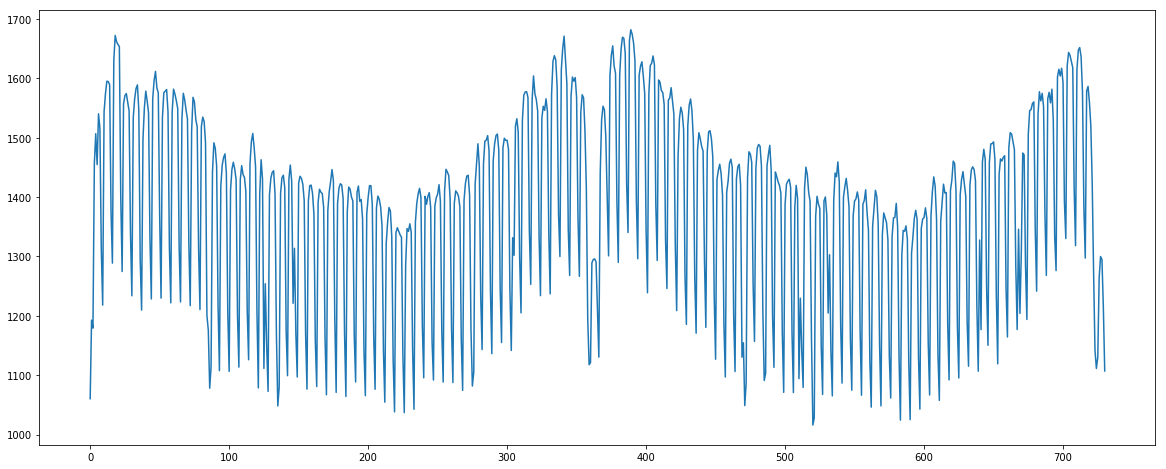

In [11]:
plt.figure(figsize=(20,8))
plt.plot(days_2016_2017)

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

### For each week predict the nexy view days

In [0]:
# most important numbers: how many days used for prediction, and how many dayes are being predicted
n_steps_in, n_steps_out = 7, 30

In [13]:
X, Y = split_sequence(days_2016_2017, n_steps_in, n_steps_out)
X.shape, Y.shape

((695, 7), (695, 30))

In [14]:
X[0], Y[0]

(array([1060.366, 1192.698, 1179.282, 1456.294, 1506.737, 1454.685,
        1540.304]),
 array([1515.84 , 1311.996, 1217.985, 1543.692, 1574.058, 1595.181,
        1594.6  , 1589.38 , 1376.513, 1288.699, 1629.911, 1672.32 ,
        1661.646, 1657.049, 1653.635, 1400.292, 1274.629, 1556.816,
        1570.884, 1574.427, 1559.91 , 1545.318, 1339.319, 1233.714,
        1533.857, 1565.493, 1583.04 , 1588.979, 1545.368, 1293.588]))

In [15]:
X[1], Y[1]

(array([1192.698, 1179.282, 1456.294, 1506.737, 1454.685, 1540.304,
        1515.84 ]),
 array([1311.996, 1217.985, 1543.692, 1574.058, 1595.181, 1594.6  ,
        1589.38 , 1376.513, 1288.699, 1629.911, 1672.32 , 1661.646,
        1657.049, 1653.635, 1400.292, 1274.629, 1556.816, 1570.884,
        1574.427, 1559.91 , 1545.318, 1339.319, 1233.714, 1533.857,
        1565.493, 1583.04 , 1588.979, 1545.368, 1293.588, 1209.617]))

In [16]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(695, 7, 1)

In [17]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [18]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.models import Sequential, Model

model = Sequential()
model.add(GRU(100, activation='relu', input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               30900     
_________________________________________________________________
dense (Dense)                (None, 30)                3030      
Total params: 33,930
Trainable params: 33,930
Non-trainable params: 0
_________________________________________________________________


In [20]:
%%time

history = model.fit(X, Y, epochs=200, verbose=0)

CPU times: user 1min 8s, sys: 4.48 s, total: 1min 12s
Wall time: 47 s


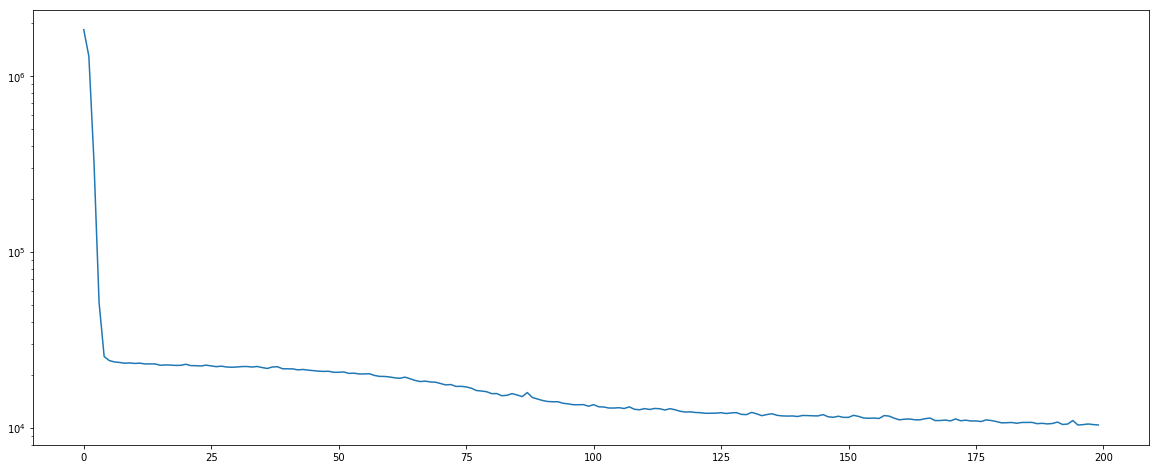

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.yscale('log')
plt.plot(history.history['loss'])

In [22]:
model.evaluate(X, Y, verbose=0)

10311.53794542491

In [23]:
final_week_2017 = X[-1]
final_week_2017

array([[1333.15585],
       [1276.09818],
       [1602.17797],
       [1615.38061],
       [1603.98435],
       [1617.03309],
       [1592.96187]])

In [0]:
first_week_2018 = model.predict(final_week_2017.reshape(1, 7, 1))

In [25]:
first_week_2018

array([[1419.0277, 1387.9773, 1550.2256, 1659.7906, 1652.978 , 1597.4357,
        1549.2286, 1430.3123, 1342.8698, 1540.9883, 1663.1393, 1639.0566,
        1587.9617, 1559.9509, 1409.139 , 1338.9952, 1515.6309, 1643.1152,
        1642.215 , 1572.5984, 1533.6981, 1395.2191, 1338.6145, 1515.3207,
        1632.4557, 1644.8619, 1590.0173, 1555.1226, 1387.5775, 1323.9128]],
      dtype=float32)

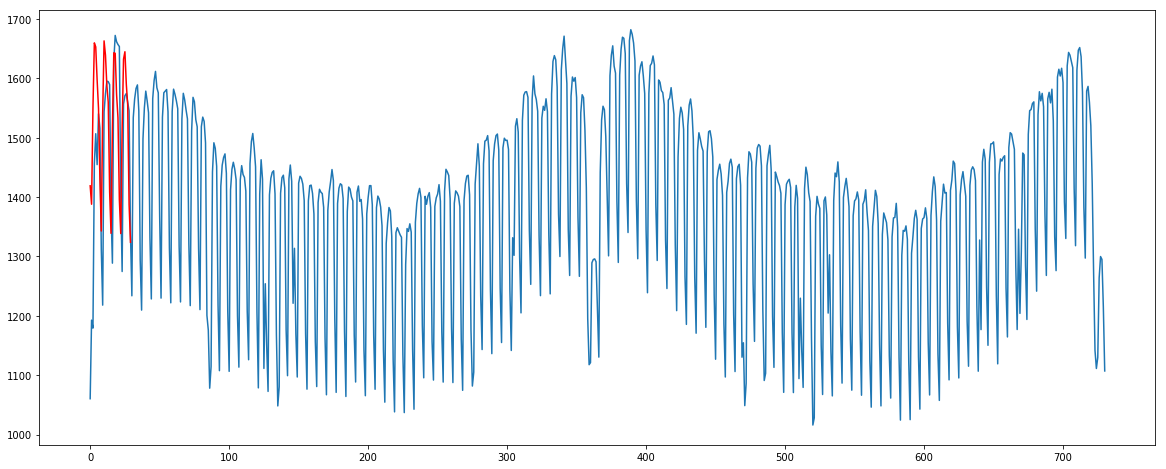

In [26]:
plt.figure(figsize=(20,8))

plt.plot(days_2016_2017)
plt.plot(first_week_2018[0], color='r')

In [0]:
known_x = np.arange(len(days_2016_2017))
pred_x = np.arange(len(days_2016_2017), len(days_2016_2017) + n_steps_out)

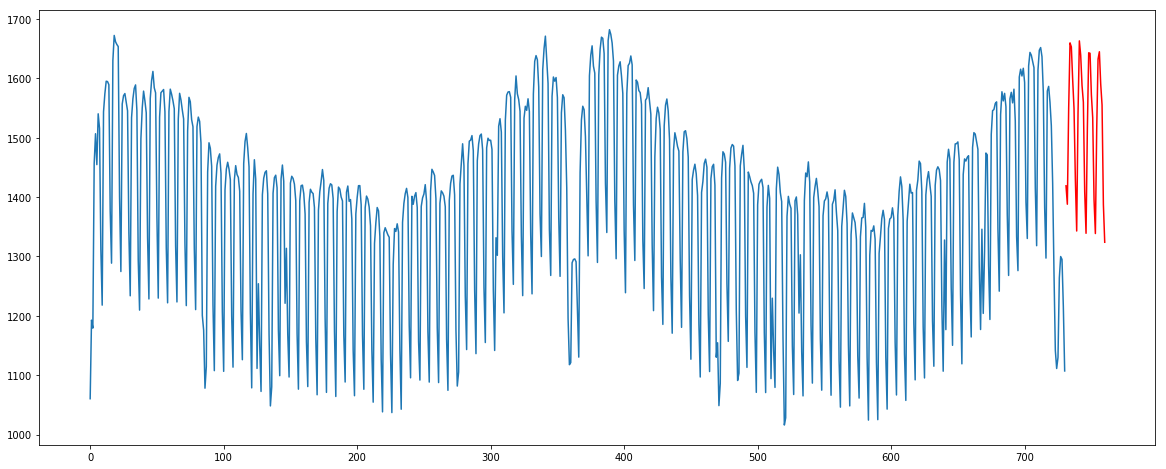

In [28]:
plt.figure(figsize=(20,8))

plt.plot(known_x, days_2016_2017)
plt.plot(pred_x, first_week_2018[0], color='r')